In [43]:
print("Hello world")

Hello world


In [44]:
import pandas as pd
from service_time_fake import *

In [45]:
#class service_time:
  #def __init__(self, gross_weight, floor, can_use_trolley, has_elevator, postnr, predicted_st, actual_st):
      #self.gross_weight = gross_weight
      #self.floor = floor
      #self.can_use_trolley = can_use_trolley
      #self.has_elevator = has_elevator
      #self.postnr = postnr
      #self.predicted_st = predicted_st
      #self.actual_st = actual_st


In [46]:
service_time1 = service_time(2, 3, True, True, "0680", 3, 4)
service_time2 = service_time(20, 3, True, True, "0680", 11, 12)
service_time3 = service_time(40, 3, True, True, "0680", 15, 16)
service_time4 = service_time(10, 3, True, True, "0680", 7, 8)
service_time5 = service_time(15, 3, True, True, "0680", 8, 9)
service_time6 = service_time(90, 3, True, True, "0680", 17, 18)
service_time7 = service_time(500, 3, True, True, "0680", 59, 60)
service_time8 = service_time(120, 3, True, True, "0680", 19, 20)
service_time9 = service_time(50, 3, True, True, "0680", 17, 18)
service_time10 = service_time(43, 3, True, True, "0680", 15, 16)

service_time11 = service_time(30, 3, True, True, "0680", 12, 20)

In [47]:
df = [service_time1, service_time2, service_time3, service_time4, service_time5, service_time6, service_time7, service_time8, service_time9, service_time10]

for x in range (1, 100, 1):
    service_time_sample = service_time(None, 3, True, True, "0680", None, None)
    df.append(service_time_sample)

df = pd.DataFrame(vars(f) for f in df)

df.tail()

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual_st
104,98,3,True,True,0680,NaN,16
105,23,3,True,True,0680,NaN,9
106,83,3,True,True,0680,NaN,15
107,90,3,True,True,0680,NaN,15
108,71,3,True,True,0680,NaN,14


In [48]:
from sklearn.model_selection import train_test_split 

X = df.drop(['predicted_st', 'actual_st'],axis=1) 
Y = df['actual_st']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(X_train, Y_train)
reg_predict = reg_model.predict(X_test) #Predictions on Testing data
print(reg_predict)

[ 7.15590272 11.50041191  9.62437385 10.51302346 14.36383842 14.95627149
 13.57392766 18.41213107  9.22941847  7.35338041  7.84707463 11.10545653
 15.94365994 12.88275574 10.01932923  7.74833579  7.5508581  15.44996572
  8.93320193 13.57392766 16.23987648 11.50041191]


In [50]:
X_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
84,6,3,True,True,0680
10,50,3,True,True,0680
75,31,3,True,True,0680
2,40,3,True,True,0680
24,79,3,True,True,0680
100,85,3,True,True,0680
108,71,3,True,True,0680
7,120,3,True,True,0680
16,27,3,True,True,0680
86,8,3,True,True,0680


In [51]:
df_test = [service_time11]
df_test = pd.DataFrame(vars(f) for f in df_test)
df_test = df_test.drop(['predicted_st', 'actual_st'],axis=1)
df_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
0,30,3,True,True,0680


In [52]:
Test1 = reg_model.predict(df_test)
Test1

array([9.525635])

In [53]:
reg_model.score(X_train, Y_train)

0.9975034626918449

In [54]:
reg_model.score(X_test, Y_test)

0.989476663951977

Fordi vi kun nå ser på en enkelt kunde, vil som oftest alle verdier utenom vekt forbli den samme.
Vi forventer derfor at modellen klarer å gjøre en bra prediction på enkelt kunder, så lenge kunden har fått nok leveringer til at dataen kan tolkes som mer eller mindre gyldig. 

In [55]:
df_testing = []

for x in range (1, 100, 1):
    service_time_sample = service_time(None, 3, True, True, "0680", None, None)
    df_testing.append(service_time_sample)

df_testing = pd.DataFrame(vars(f) for f in df_testing)
df_testing_actual = df_testing['actual_st']
df_testing = df_testing.drop(['predicted_st', 'actual_st'],axis=1)
df_testing['predicted_st'] = reg_model.predict(df_testing)

df_testing

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st
0,80,3,True,True,0680,14.462577
1,46,3,True,True,0680,11.105457
2,84,3,True,True,0680,14.857533
3,55,3,True,True,0680,11.994106
4,52,3,True,True,0680,11.697890
...,...,...,...,...,...,...
94,89,3,True,True,0680,15.351227
95,84,3,True,True,0680,14.857533
96,52,3,True,True,0680,11.697890
97,89,3,True,True,0680,15.351227


In [56]:
df_testing['actual'] = df_testing_actual
df_testing

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual
0,80,3,True,True,0680,14.462577,14
1,46,3,True,True,0680,11.105457,11
2,84,3,True,True,0680,14.857533,15
3,55,3,True,True,0680,11.994106,12
4,52,3,True,True,0680,11.697890,12
...,...,...,...,...,...,...,...
94,89,3,True,True,0680,15.351227,15
95,84,3,True,True,0680,14.857533,15
96,52,3,True,True,0680,11.697890,12
97,89,3,True,True,0680,15.351227,15


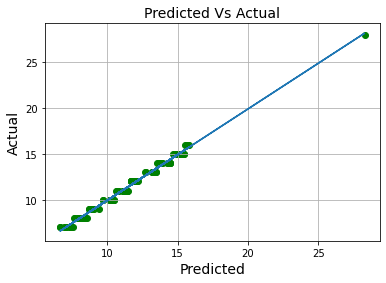

In [59]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(df_testing['predicted_st'], df_testing['actual'], color='green')

m, b = np.polyfit(df_testing['predicted_st'], df_testing['actual'], 1)
plt.plot(df_testing['predicted_st'], m*df_testing['predicted_st'] + b)

plt.title('Predicted Vs Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.grid(True)
plt.show()